Um código para demodução do sinal 4 -pam, considerar que o sinal passou por um canal ruidoso.

<ipython-input-4-312f8148367c>:106: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t, demodulated_symbols, use_line_collection=True)


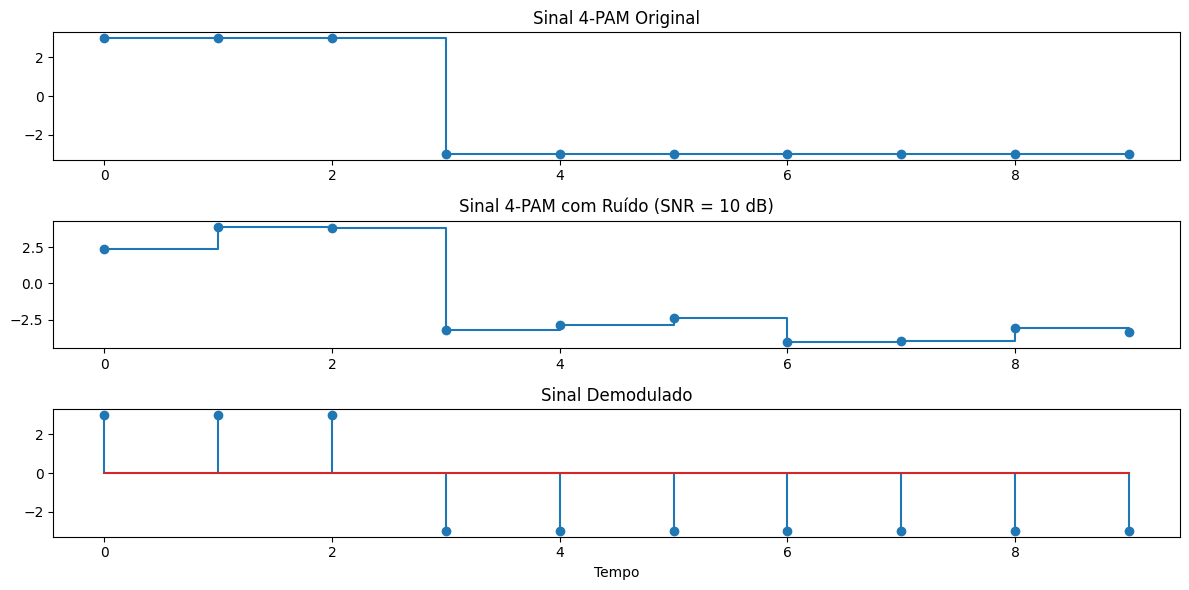

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a função que vai realizar o cálculo
# A função recebe uma sequencia de bits, e utiliza amplitude e duração de símbolos com o valor padrão 1
# A função retorna o sinal 4PAM
# É a mesma função do item anterior
def generate_4_pam_signal(bits, amplitude=1, symbol_duration=1):
    """
    Gera um sinal 4-PAM a partir de uma sequência de bits binários.

    Args:
        bits (list): Lista de bits de entrada binários (0 ou 1).
        amplitude (float): Amplitude do sinal PAM (padrão é 1).
        symbol_duration (float): Duração de cada símbolo (padrão é 1).

    Returns:
        np.array: Sinal 4-PAM.
    """
    # Mapeando os bits binários para símbolos 4-PAM
    pam_symbols = [amplitude * (-3 if bit == 0 else 3) for bit in bits]

    # Criando o eixo de tempo
    t = np.arange(0, len(bits) * symbol_duration, symbol_duration)

    # Gerando o sinal 4-PAM
    signal = np.repeat(pam_symbols, int(1 / symbol_duration))

    # Retornando o sinal calculado
    return t, signal

# Definindo a função que vai gerar o ruído
# Foi utilizado o ruído AWGN
def add_awgn_noise(signal, snr_dB):
    """
    Adiciona ruído AWGN (Gaussiano branco aditivo) ao sinal.

    Args:
        signal (np.array): Sinal original.
        snr_dB (float): Relação sinal-ruído em dB.

    Returns:
        np.array: Sinal com ruído.
    """

    # Calculando o ruído do sinal
    snr_linear = 10 ** (snr_dB / 10)
    noise_power = np.var(signal) / snr_linear
    noise = np.sqrt(noise_power) * np.random.randn(len(signal))
    noisy_signal = signal + noise

    # Retornando o sinal com ruído
    return noisy_signal

# Definindo a função que vai Demodular o sinal 4PAM
# A função usa o rinal recebido e um valor padrão pra thresold como parametros
def demodulate_4_pam_signal(received_signal, threshold=0):
    """
    Demodula um sinal 4-PAM.

    Args:
        received_signal (np.array): Sinal recebido após passar pelo canal ruidoso.
        threshold (float): Limiar de decisão (default é 0).

    Returns:
        np.array: Sinal demodulado (valores discretos -3, -1, 1, 3).
    """

    #Calculando os símbolos demodulados
    demodulated_symbols = np.zeros(len(received_signal), dtype=int)
    for i, sample in enumerate(received_signal):
        if sample < threshold:
            demodulated_symbols[i] = -3
        else:
            demodulated_symbols[i] = 3
    return demodulated_symbols #retornando os símbolos demodulados

# Parâmetros
snr_dB = 10  # Relação sinal-ruído em dB
symbol_duration = 1  # Duração de cada símbolo
num_bits = 10  # Número de bits

# Gera uma sequência aleatória de bits
input_bits = np.random.randint(2, size=num_bits)

# Gera o sinal 4-PAM
t, pam_signal = generate_4_pam_signal(input_bits)

# Adiciona ruído AWGN
noisy_signal = add_awgn_noise(pam_signal, snr_dB)

# Demodula o sinal
demodulated_symbols = demodulate_4_pam_signal(noisy_signal)

# Plot dos sinais
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(t, pam_signal, marker='o', linestyle='-', drawstyle='steps-post')
plt.title("Sinal 4-PAM Original")

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, marker='o', linestyle='-', drawstyle='steps-post')
plt.title(f"Sinal 4-PAM com Ruído (SNR = {snr_dB} dB)")

plt.subplot(3, 1, 3)
plt.stem(t, demodulated_symbols, use_line_collection=True)
plt.title("Sinal Demodulado")
plt.xlabel("Tempo")
plt.tight_layout()
plt.show()